# Probably Happy 
###    Analyzing World Happiness through GDP and Life Expectancy

### I. Overview of Data
In the dataset composed from the Gallup World Poll and compiled by the Sustainable Developmentment Solutions Network (eventually endorsed by the United Nations in 2017), the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness/home) provides data on over 150 countries ranking them by their self-prescribed happiness levels along with six factors that contribute to their happiness: economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import math

In [2]:
data_folder = 'C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\'
df_2015 = pd.read_csv(data_folder+'2015.csv')
df_2015.rename(columns={'Happiness Rank':'Rank', 'Happiness Score':'Score', 'Standard Error':'SE', 
                        'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'LifeExp', 
                        'Trust (Government Corruption)':'Corruption', 'Dystopia Residual':'Dystopia'}, inplace=True)

In [3]:
df_2015.head()

,Country,Region,Rank,Score,SE,Economy,Family,LifeExp,Freedom,Corruption,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


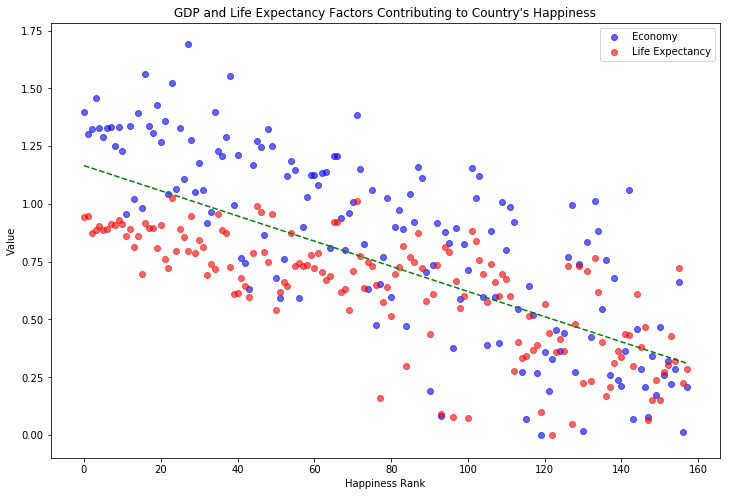

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_2015.index, y=df_2015['Economy'], label='Economy', color='b', linewidth=1, alpha=.6)
plt.scatter(x=df_2015.index, y=df_2015['LifeExp'], label='Life Expectancy', color='r', linewidth=1, alpha=.6)
plt.xlabel('Happiness Rank')
plt.ylabel('Value')
plt.legend()
plt.title('GDP and Life Expectancy Factors Contributing to Country\'s Happiness')

# Average trend line
x = df_2015.index
y = (df_2015['Economy']+df_2015['LifeExp'])/2
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.show()

While the scatter plot above appears to make a case for a general correlation between GDP and life expectancy on happiness, the data set doesn't explain exactly how the values were derived. In a description of the dataset, the author writes, "The columns following the happiness score estimate the extent to which each of six factors [...] contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors." Therefore, since there seems to be a high potential for inaccurate and unnecessary data manipulation with these values, we will be using the two additional data sets.

Focusing specifically on the quanitifiable measurements of economic production and life expectancy, this project will use two supplemental datasets that record the countries' [GDP from World Bank Data](https://www.kaggle.com/ibrahimmukherjee/gdp-world-bank-data/home) and [life expectancy from World Bank Data](https://data.worldbank.org/indicator/SP.DYN.LE00.IN). For the purposes of this project, the data will be limited to the 40 years preceding the release of the 2015 World Happiness Report (ranging from 1975-2015). The reason for this limiting of years is twofold: the first is practical in that there was considerably more data missing before the year 1975 which would limit the overall observations.

The second reason for my limiting of the years - and the motivation of my interest in the subject - is the assumption that happiness is based on relative growth, knowing your current position in light of where you once were. In other words, the GDP and life expectancy, when viewed in isolation from other years, tells a weaker narrative than the development of a country across the years. Happiness is positive perspective, and positive perspective generally is that which has seen growth over the years. Therefore, since GDP and life expectancy are easily quantifiable, my report will focus on the analysis of this data. 

In [5]:
GDP = pd.read_excel(data_folder+'Country_GDP.xlsx')
life_expectancy = pd.read_excel(data_folder+'Life_Expectancy.xlsx')

GDP = GDP.drop(columns=[str(year) for year in range(1960, 1975)])
life_expectancy = life_expectancy.drop(columns=[year for year in range(1960,1975)])
life_expectancy = life_expectancy.drop(columns=[year for year in range(2016,2018)])

In [6]:
happiest_countries_2015 = df_2015[df_2015['Rank'] < 11]
saddest_countries_2015 = df_2015[df_2015['Rank'] > 147]
happiest_plot_frame = GDP[GDP['Country Name'].isin(happiest_countries_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
saddest_plot_frame = GDP[GDP['Country Name'].isin(saddest_countries_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')

In [7]:
def plot_gpd(df, country):
    '''This plots the GDP of the country/countries specified.'''
    df.T.plot(kind='line', figsize=(12,5))
    plt.xlabel('Years')
    plt.ylabel('GDP')
    plt.xticks([i for i in range(0, 41, 5)], [str(year) for year in range(1975, 2016, 5)])
    plt.title('GDP for {}'.format(country))
    plt.tight_layout()
    plt.show()

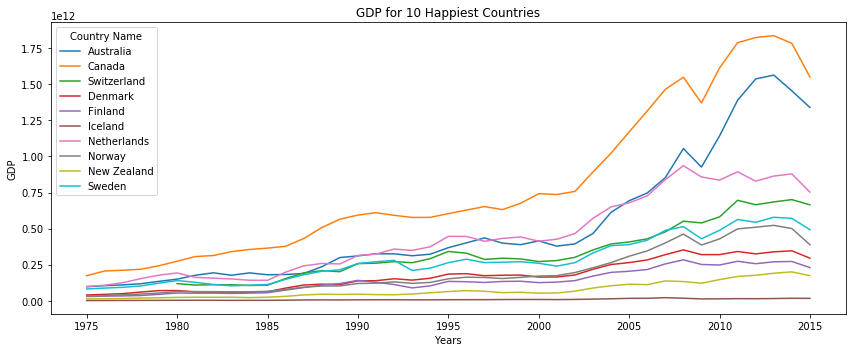

In [8]:
plot_gpd(happiest_plot_frame, "10 Happiest Countries")

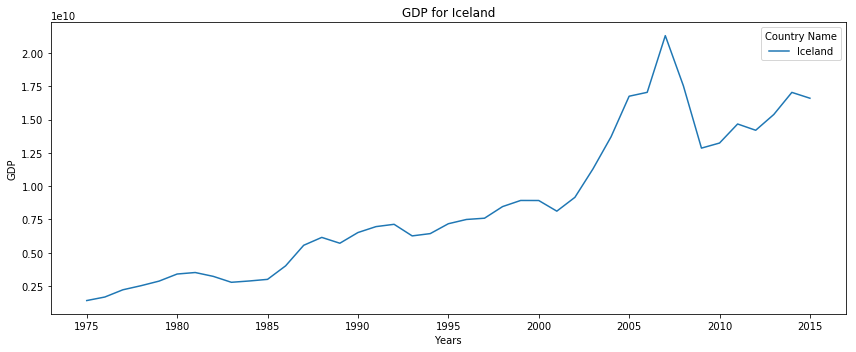

In [9]:
#Observing the trend of Iceland in isolation
plot_gpd(happiest_plot_frame[happiest_plot_frame.index == 'Iceland'], "Iceland")

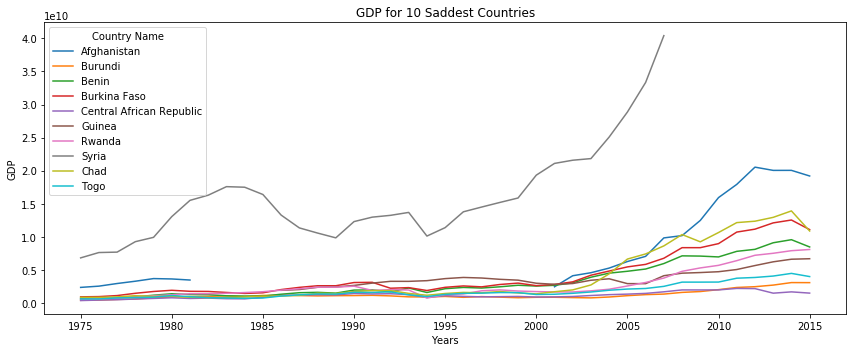

In [10]:
plot_gpd(saddest_plot_frame, "10 Saddest Countries")

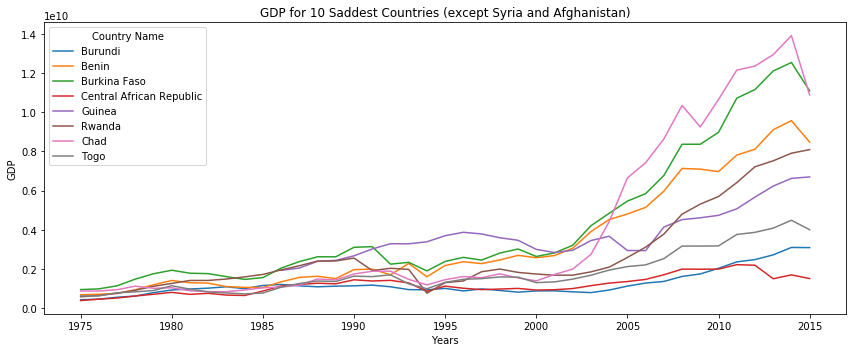

In [11]:
#Observing the trends without Syria and Afghanistan to more accurately read the majority trends of saddest countries
saddest_exceptions = saddest_plot_frame.drop(['Syria', 'Afghanistan'])
plot_gpd(saddest_exceptions, "10 Saddest Countries (except Syria and Afghanistan)")

A quick analysis of the happiest and saddest countries provides us with a few insights. Observing the happiest countries, we see the range of wealth is considerably varied (especially when Iceland is compared to Canada). Moreover, observing the saddest countries, we see that Afghanistan stands as an example of how we aren't dealing with perfectly complete data. Lastly, we see a hint of more aggressive GDP fluctuation in the saddest countries.

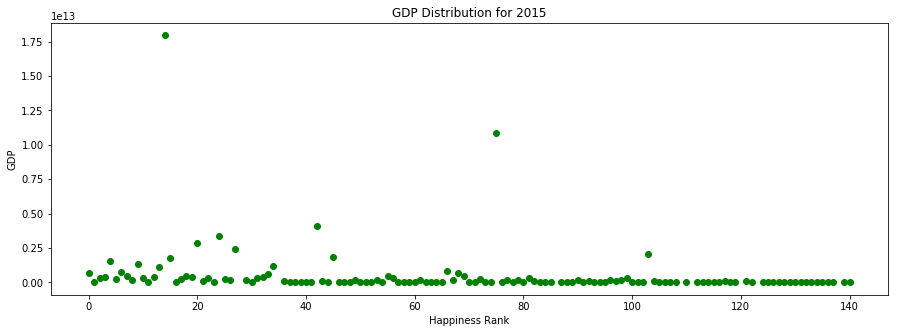

,2015
Country Name,
United States,1.794700e+13


In [12]:
all_plot_frame = GDP[GDP['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
gdp_2015 = pd.DataFrame(all_plot_frame.loc[:, '2015'])
rankings = pd.DataFrame(df_2015['Country'])
ranked_gdp_2015 = pd.merge(left=rankings, right=gdp_2015, left_on=['Country'], right_on=[gdp_2015.index])
ranked_gdp_2015 = ranked_gdp_2015.drop('Country', axis=1)

plt.figure(figsize=(15,5))
plt.scatter(x=ranked_gdp_2015.index, y=ranked_gdp_2015['2015'], color='g')
plt.title('GDP Distribution for 2015')
plt.ylabel('GDP')
plt.xlabel('Happiness Rank')
plt.show()
gdp_2015.loc[gdp_2015['2015'] == gdp_2015['2015'].max()]

Continuing in the GDP analysis, it is worth mentioning that upon doing a simple plot of the stagnant GDP of 2015, the happier countries are, for the most part, wealthier than the sadder countries. Moreover, the plot shows considerable outliers in the GDP spread - chief among them being the United States.

### II. Research Analysis

With the exploratory analysis of the data, we will now focus on the actual development of GDP and life expectancy between the years of 1975 and 2015. The three research questions to be answered are as follows:

1. How does the percentage increase of GDP over 40 years affect the happiness of a country?
2. How does the percentage increase of life expectancy over 40 years affect the happiness of a country?
3. How does the average growth of GDP and life expectancy affect the happiness of a country?

##### Research Question 1. How does the percentage increase of GDP over 40 years affect the happiness of a country?

In [13]:
gdp_plot_frame = GDP[GDP['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
le_plot_frame = life_expectancy[life_expectancy['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code', 'Indicator Name', 'Indicator Code']).set_index('Country Name')

To begin, we will use a bar graph to view the count spread of the percentage GDP growth across all countries also in our happiness data set. The distribution below shows a nearly normal distribution. Considering that there are only approximately 150 countries (of the 195) currently plotted - and considering the number of countries is so few at all - it would be reasonable to assume that a larger population would normalize this distribution even more.

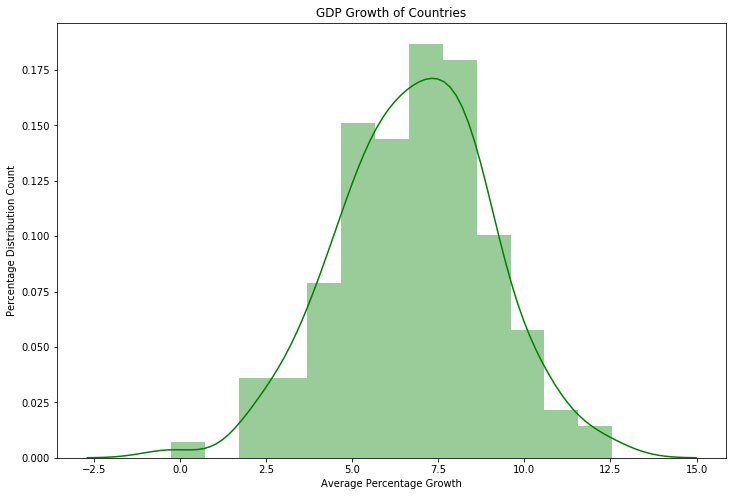

In [14]:
gdp_growth = gdp_plot_frame.pct_change(axis='columns').fillna(value=0).drop(labels='1975', axis=1)
gdp_growth_mean = ((gdp_growth.T.mean())*100)

plt.subplots(figsize=(12,8))
sns.distplot(gdp_growth_mean, color='g', axlabel='Average Percentage Growth').set_title('GDP Growth of Countries')
plt.ylabel('Percentage Distribution Count')
plt.show()

While the bar chart above shows a promisingly even distribution, the line chart below shows that there is no immediate correlation between the growth of a country's GDP and its happiness. For example, the happiest country that begins the graph below starts around the 5% growth mark and sporatically increases in percentage growth (although it never dips below the original starting position).

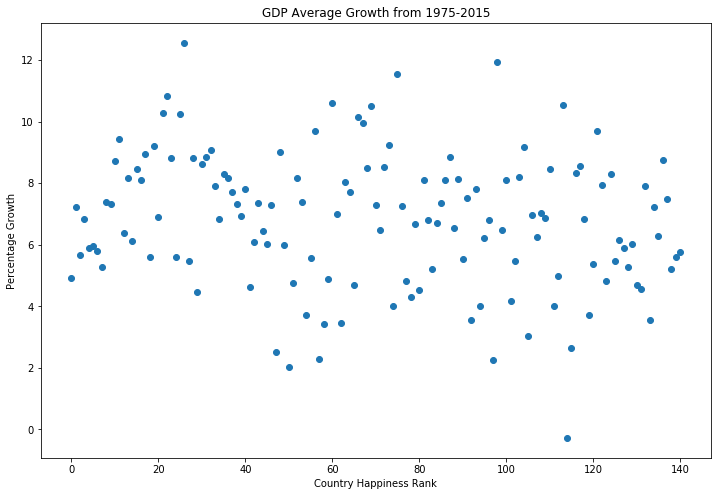

In [15]:
gdp_mean = pd.DataFrame(gdp_growth_mean)
ranked_gdp_growth = pd.merge(left=rankings, right=gdp_mean, left_on=['Country'], right_on=[gdp_mean.index])
ranked_gdp_growth.columns = ['Country', 'Percentage Growth']

plt.figure(figsize=[12,8])
plt.scatter(x=ranked_gdp_growth.index, y=ranked_gdp_growth['Percentage Growth'])
plt.xlabel('Country Happiness Rank')
plt.ylabel('Percentage Growth')
plt.title('GDP Average Growth from 1975-2015')
plt.show()

Moreover, it's noticeable in the chart above that the greatest percentage growth is somewhere just shy of the 100 happiness rank. We find this country to be Qatar who experienced an average growth of roughly 12.5% each year between 1975 and 2015 - beginning with a GDP of 2.512784e+09 and ending with one of 1.669077e+11

In [16]:
#Finding highest GDP growth country
ranked_gdp_growth.loc[ranked_gdp_growth['Percentage Growth'] == ranked_gdp_growth['Percentage Growth'].max()]

,Country,Percentage Growth
26,Qatar,12.556945


In [17]:
#Exploring this outlier
print(gdp_plot_frame.loc['Qatar'].head())
print(gdp_plot_frame.loc['Qatar'].tail())

1975    2.512784e+09
1976    3.284301e+09
1977    3.617580e+09
1978    4.052000e+09
1979    5.633000e+09
Name: Qatar, dtype: float64
2011    1.698047e+11
2012    1.902898e+11
2013    2.018854e+11
2014    2.101093e+11
2015    1.669077e+11
Name: Qatar, dtype: float64


In conclusion of the first research question, there is no direct correlation between the GDP growth of a country and its happiness rank. When applied to a GDP analysis, my assumption - that happiness is primarily a positive perspective that has seen growth over the years - is debunked. Since the answer seems clear when the question is framed this way, it would be reasonable to assume the same conclusion with an analysis of life expectancy.

##### Research Question 2. How does the percentage increase of life expectancy over 40 years affect the happiness of a country?
Following the same process, we will analyze the growth in life expectancy of the same countries. Seen below is the bar chart for life expectancy growth of countries; differing from the GDP distribution, the life expectancy distribution takes more of a gamma distribution shape. The chart starts out with no growth/minimal growth being unlikely; it then peaks around 0.3% growth; and, finally, decreases in likelihood of experiencing a greater percentage increase up until 1.5% growth. Moreover, there is also a considerable outlier peaking around 2.7% growth.

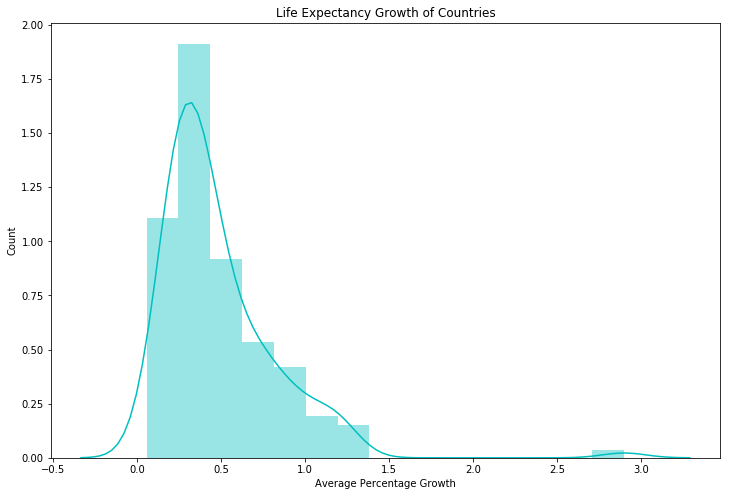

In [18]:
le_growth = le_plot_frame.pct_change(axis='columns').fillna(value=0).drop(labels=1975, axis=1)
le_growth_mean = ((le_growth.T.mean())*100)

plt.subplots(figsize=(12,8))
sns.distplot(le_growth_mean,bins=15, color='c', axlabel='Average Percentage Growth').set_title('Life Expectancy Growth of Countries')
plt.ylabel('Count')
plt.show()

As before, we move forward to plot the growth data of life expectancy relative to the respective happiness ranking. Observing the data, we see that the first 20 countries experience little movement; in contrast, the last 20 countries experience considerably more movement. Once again, the incredible outlier appears, with its position between 120 and 130 on the happiness rank.

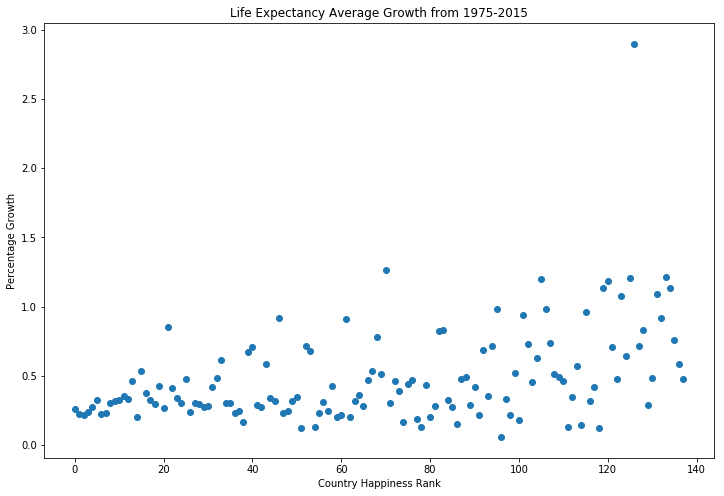

In [19]:
le_mean = pd.DataFrame(le_growth_mean)
ranked_country_growth = pd.merge(left=ranked_gdp_growth, right=le_mean, left_on='Country', right_on=[le_mean.index])
ranked_country_growth.set_index(np.array(list(range(1,139))))
ranked_country_growth.columns = ['Country', 'GDP Growth', 'Life Growth']

plt.figure(figsize=[12,8])
plt.scatter(x=ranked_country_growth.index, y=ranked_country_growth['Life Growth'])
plt.xlabel('Country Happiness Rank')
plt.ylabel('Percentage Growth')
plt.title('Life Expectancy Average Growth from 1975-2015')
plt.show()

Exploring the outlier, we discover the country to be Cambodia who has experienced an average growth of about 2.9% every year between 1975 and 2015. To quantify this relative growth, this incredible percentage increase is because of its starting life expectancy of 23 years in 1975 growing all the way to 68 years in 2015 (equalling an overall increase of roughly 190%!).

In [20]:
#Finding highest life expectancy growth country
ranked_country_growth.loc[ranked_country_growth['Life Growth'] == ranked_country_growth['Life Growth'].max()]

,Country,GDP Growth,Life Growth
126,Cambodia,5.276686,2.898391


In [21]:
#Exploring this outlier
print(le_growth_mean.loc[le_growth_mean == le_growth_mean.max()])
print('\n')
print(le_plot_frame.loc['Cambodia'].head())
print(le_plot_frame.loc['Cambodia'].tail())

Country Name
Cambodia    2.898391
dtype: float64


1975    23.595
1976    20.317
1977    18.907
1978    19.725
1979    22.744
Name: Cambodia, dtype: float64
2011    67.034
2012    67.466
2013    67.868
2014    68.251
2015    68.620
Name: Cambodia, dtype: float64


In conclusion, as assumed after the initial work of research question 1, we see that there is no direct correlation between a country's life expectancy growth and its happiness rank; in fact, there is a stronger case for an inverse relationship. However, with simple reasoning, it's clear that the sadder countries (with lower life expectancy) had considerably more room for growth than the happier countries (with a life expectancy that already started high).

##### Research Question 3. How does the average growth of GDP and life expectancy affect the happiness of a country?
Finally, grouping the two former research questions into a single observation, we will observe the effect of the two factors after scaling to see if there are any correlations between happiness and average growth of GDP and life expectancy

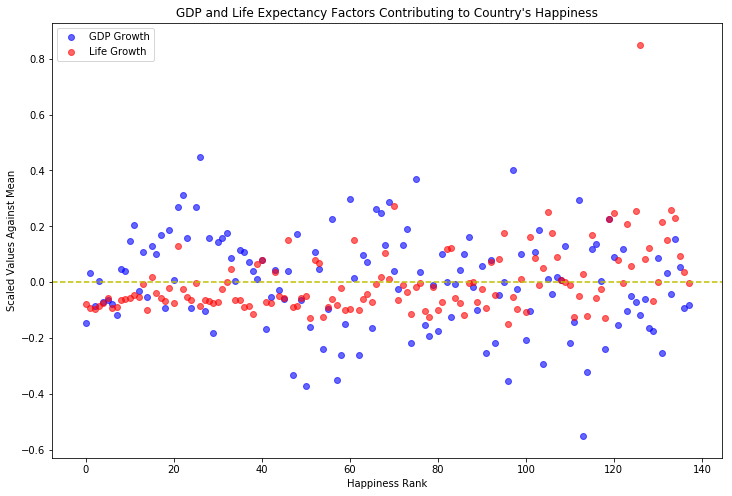

In [22]:
# Scaling and merging data for side-by-side plotting
scale_le = (le_mean-le_mean.mean())/(le_mean.max()-le_mean.min())
scale_gdp = (gdp_mean-gdp_mean.mean())/(gdp_mean.max()-gdp_mean.min())
ranked_scale_gdp_growth = pd.merge(left=rankings, right=scale_gdp, left_on=['Country'], right_on=[scale_gdp.index])
ranked_scale_growth = pd.merge(left=ranked_scale_gdp_growth, right=scale_le, left_on='Country', right_on=[scale_le.index])
ranked_scale_growth.set_index(np.array(list(range(1,139))))
ranked_scale_growth.columns = ['Country', 'GDP Growth', 'Life Growth']

plt.figure(figsize=(12,8))
plt.scatter(x=ranked_scale_growth.index, y=ranked_scale_growth['GDP Growth'], color='b', linewidth=1, alpha=.6)
plt.scatter(x=ranked_scale_growth.index, y=ranked_scale_growth['Life Growth'], color='r', linewidth=1, alpha=.6)
plt.axhline(y=0, color='y', linestyle='--')
plt.xlabel('Happiness Rank')
plt.ylabel('Scaled Values Against Mean')
plt.legend()
plt.title('GDP and Life Expectancy Factors Contributing to Country\'s Happiness')
plt.show()

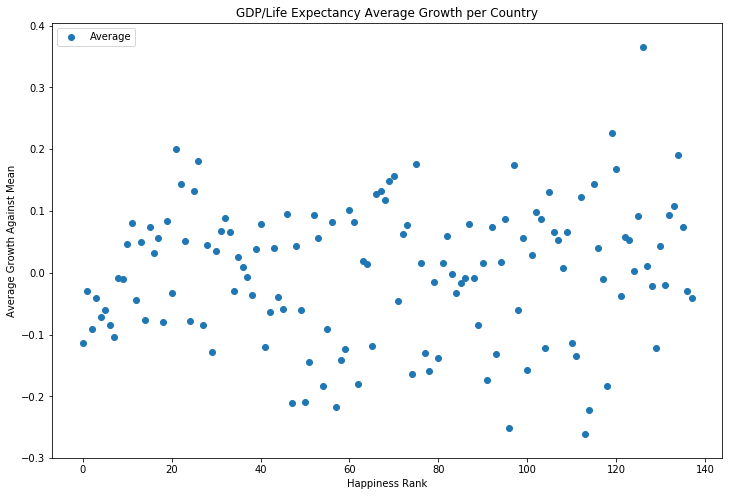

In [23]:
# Averaging the two factors into a single column
ranked_scale_growth['Average'] = (ranked_scale_growth['GDP Growth']+ranked_scale_growth['Life Growth'])/2

plt.figure(figsize=(12,8))
plt.scatter(x=ranked_scale_growth.index, y=ranked_scale_growth['Average'])
plt.xlabel('Happiness Rank')
plt.ylabel('Average Growth Against Mean')
plt.title('GDP/Life Expectancy Average Growth per Country')
plt.legend(loc='upper left')
plt.show()

Because GDP and life expectancy didn't have direct correlations on the country's happiness, the averaged data shows the same conclusion. Viewing the country's more holistic growth still doesn't show a direct correlation with its happiness.


Not surprisingly, the country that experienced the greatest overall growth is Cambodia due to its considerably greater growth in life expectancy. What is surprising, however, is that the country actually experienced a decrease in GDP growth over the 40 years.

In [24]:
# Finding country with highest normalized average
ranked_scale_growth.loc[ranked_scale_growth['Average'] == ranked_scale_growth['Average'].max()]

,Country,GDP Growth,Life Growth,Average
126,Cambodia,-0.118459,0.849357,0.365449


Continuing with the analysis, I set up relative landmarks according to the analyzed data by viewing the top 25% and bottom 25% of each grouping: GDP growth, life expectancy growth, and overall growth.

In [25]:
ranked_scale_growth.describe()

,GDP Growth,Life Growth,Average
count,138.000000,1.380000e+02,138.000000
mean,0.000942,-2.252626e-17,0.000471
std,0.171298,1.232019e-01,0.109623
min,-0.551061,-1.506431e-01,-0.260641
25%,-0.103116,-7.382313e-02,-0.078123
50%,0.007780,-4.453055e-02,0.012032
75%,0.114055,4.898057e-02,0.077147
max,0.448939,8.493569e-01,0.365449


Seen below, the average happiness rank of countries that experienced greater economic growth is 60 out of 138 - subtly hinting that, in general, the more you grow in wealth, the happier you will be (in relation to the entire population).

In [26]:
slow_gdp = ranked_scale_growth[ranked_scale_growth['GDP Growth'] < -0.094347]
fast_gdp = ranked_scale_growth[ranked_scale_growth['GDP Growth'] > 0.101744]
print('Average happiness rank of top 25% according to GDP growth is: ' + str(sum(fast_gdp['Country'].index)/len(fast_gdp['Country'].index)) + ' of 138 countries')
print('Average happiness rank of bottom 25% according to GDP growth is: ' + str(sum(slow_gdp['Country'].index)/len(slow_gdp['Country'].index)) + ' of 138 countries')

Average happiness rank of top 25% according to GDP growth is: 59.92857142857143 of 138 countries
Average happiness rank of bottom 25% according to GDP growth is: 80.3157894736842 of 138 countries


However, the opposite seems to be true of life expectancy growth. In fact, this data is slightly more polarized than a country's GDP growth. While one could come to the bizarre conclusion that growing in life expectancy more often than not leads to a sadder country, it is more reasonable to assume that a country with a steadily higher life expectancy across the years (albeit with less potential for growth) is a more likely contributing factor to a country's happiness.

In [27]:
slow_le = ranked_scale_growth[ranked_scale_growth['Life Growth'] < -0.073814]
fast_le = ranked_scale_growth[ranked_scale_growth['Life Growth'] > 0.048989]
print('Average happiness rank of top 25% according to life expectancy growth is: ' + str(sum(fast_le['Country'].index)/len(fast_le['Country'].index)) + ' of 138 countries')
print('Average happiness rank of bottom 25% according to life expectancy growth is: ' + str(sum(slow_le['Country'].index)/len(slow_le['Country'].index)) + ' of 138 countries')

Average happiness rank of top 25% according to life expectancy growth is: 97.54285714285714 of 138 countries
Average happiness rank of bottom 25% according to life expectancy growth is: 54.857142857142854 of 138 countries


In [28]:
slow_average = ranked_scale_growth[ranked_scale_growth['Life Growth'] < -0.074675]
fast_average = ranked_scale_growth[ranked_scale_growth['Life Growth'] > 0.069673]
print('Average happiness rank of top 25% according to average growth is: ' + str(sum(fast_average['Country'].index)/len(fast_average['Country'].index)) + ' of 138 countries')
print('Average happiness rank of bottom 25% according to average growth is: ' + str(sum(slow_average['Country'].index)/len(slow_average['Country'].index)) + ' of 138 countries')

Average happiness rank of top 25% according to average growth is: 99.80645161290323 of 138 countries
Average happiness rank of bottom 25% according to average growth is: 55.61764705882353 of 138 countries


### III. Further Research
Although no noticeable correlations were found through the basic study of GDP and life expectancy growth above, with further research I am confident that there would be findings that show correlation between the two factors and the consequence of happiness. Some options for further research that might reveal these correlations would be:
1. Creating a grouping system that lumps similar countries together and observes their interactions within their group. The reason for this grouping is evident when comparing a country like Central African Republic (lowest GDP, lowest life expectancy) to a country like the United States (highest GDP, highest life expectancy). By doing this, it would then be beneficial to analyze comparable countries and study their growth and its effect on their happiness.
2. Studying the stability of a country's happiness using the additional happiness datasets of 2016 and 2017 to see if it is possible to predict the happiness ranking fluctuation based on the development of the two factors of GDP and life expectancy from the preceding 40 years.
3. Analyze the interplay between GDP and life expectancy of a country between certain years. For example, when do countries most often experience a major growth in life expectancy relative to its GDP's growth? Do countries that experience a major growth of GDP over 5 years typically experience a boost in life expectancy in the the following five years? What is the optimal GDP growth rate that returns the greatest growth in life expectancy?